**Main Challenge:**       
  Tweet Sentiment Analysis

**Goal:**         
Classify tweets into Positive, Neutral, or Negative categories using Machine Learning techniques learned during Cycle-2.

**Dataset :**     
https://www.kaggle.com/datasets/kazanova/sentiment140


***Connecting Google Drive:***     
We connected Google Drive so we can use files from it in our Colab notebook.

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the Dataset:**    
We loaded the tweet dataset from Google Drive into a pandas DataFrame so we can start working with it.

In [18]:
import pandas as pd
file_path = '/content/drive/MyDrive/ACM-TASKS/training.1600000.processed.noemoticon.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
df.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**Cleaning the Tweets:**   
We removed links, mentions, symbols, and special characters from the tweets and converted them to lowercase to make the text clean and ready for analysis.

In [19]:
import re
def clean_tweet(tweet):
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"@\w+", "", tweet)
    tweet = re.sub(r"#", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    tweet = tweet.lower().strip()
    return tweet
df['clean_text'] = df['text'].apply(clean_tweet)

**Mapping Sentiment Labels:**    
We changed the sentiment values from numbers (0, 2, 4) to words (Negative, Neutral, Positive) to make them easier to understand.

In [20]:
label_map = {0: 'Negative', 2: 'Neutral', 4: 'Positive'}
df['sentiment'] = df['sentiment'].map(label_map)

**Converting Text to Numbers (TF-IDF):**     
We used TF-IDF to turn the cleaned tweets into numbers, so the machine learning model can understand and learn from the text.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
print("TF-IDF feature matrix shape:", X.shape)

TF-IDF feature matrix shape: (1600000, 5000)


In [9]:
y = df['sentiment']

**Training the Model:**   
We split the data into training and testing sets, then trained a Logistic Regression model to learn how to predict the sentiment of tweets.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

**Checking Model Accuracy:**   
We used the test data to see how well the model predicts tweet sentiments and printed its accuracy score.

In [13]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.79021875


**Detailed Model Performance:**    
We printed a classification report to see how well the model performs for each sentiment type using precision, recall, and F1-score.

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.80      0.78      0.79    160000
    Positive       0.78      0.80      0.79    160000

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



**Confusion Matrix Visualization:**
We created a confusion matrix plot to visually compare the model’s predicted sentiments with the actual sentiments and see where it made mistakes.

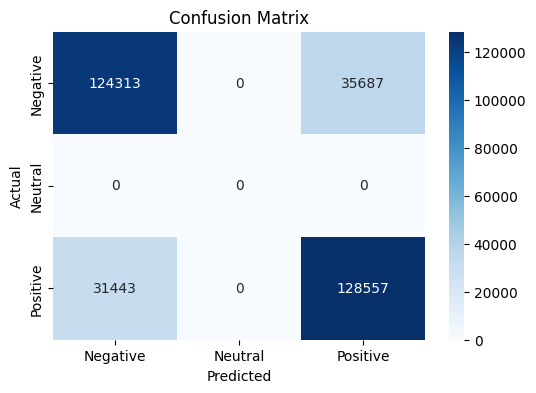

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=['Negative', 'Neutral', 'Positive'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Summary:   
I used Logistic Regression for this task because it is simple, fast, and works well with text data. I used TF-IDF to turn the tweets into numbers by giving more importance to meaningful words and less to common ones. Some challenges I faced were that tweets had a lot of extra things like links and mentions, but I cleaned them during preprocessing. After splitting the data into training and testing sets, I trained the model and got a good accuracy of around  0.790.